<a href="https://colab.research.google.com/github/jvishnuvardhan/Stackoverflow_Questions/blob/master/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install keras
import keras

In [24]:
import numpy as np

from keras import backend as K
from matplotlib import pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from keras import Sequential
from keras.layers import Dense, Conv2D, Activation
from keras.activations import softmax

from skimage import io
from skimage import transform
#use the output before softmax
#this is because target score could increase by decrease other class score

def unnormed_output_model():
      #check if last layer has softmax as activation
    assert vgg.layers[-1].activation == softmax
    vgg.layers[-1].activation = None
    #get the weights from last layer
    #weights = vgg.layers[-1].get_weights()

    #create a new layer as last layer, set it weights use 'weights'
    #config = vgg.layers[-1].get_config()
    #config['activation'] = None
    #lastlayer_without_softmax = Dense(**config)

    #--------lastlayer_without_softmax.set_weights(weights)-------------

    #build a new model, and set lastlayers weight
    #vgg_without_softmax = Model(inputs=vgg.input, outputs=lastlayer_without_softmax.output)
    vgg_without_softmax = Model(inputs=vgg.input, outputs=vgg.output) # you don't need this also as activation of last layer of vgg was updated
    #vgg_without_softmax.layers[-1].set_weights(weights)

    return vgg_without_softmax

def mygrad(input_img, loss):
    return K.gradients(loss, input_img)

if __name__ == '__main__':
    #loss = vgg.layers[-1].output - np.sum(input_img.flatten()**2)
    vgg = VGG16()
    get_unnormed_output = unnormed_output_model()
    get_unnormed_output.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [25]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [26]:
print(get_unnormed_output.layers[-1].activation)

None


In [27]:
vgg.layers[-1].activation = None
print(vgg.layers[-1].activation)

None


In [0]:
from keras.utils import plot_model

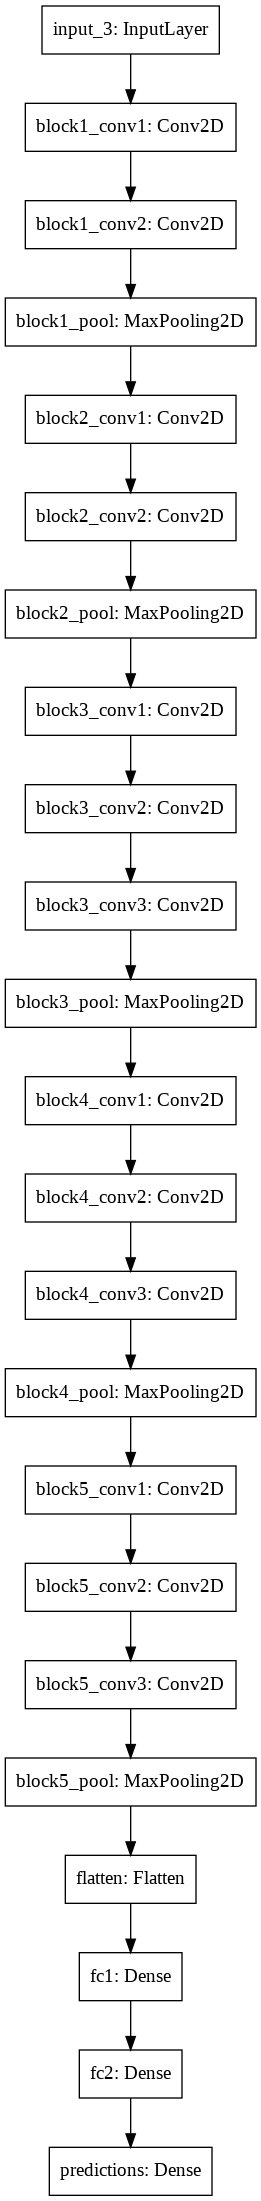

In [29]:
plot_model(vgg)